# Coleção de Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Coleção de dados por questão

In [2]:
execution_csv_src = '../output/metrics/executions.csv'
df_execution = pd.read_csv(execution_csv_src, index_col='question')
df_execution

,num_students_interactions,num_submissions,num_tests,num_correct,num_errors,num_logic_errors,num_syntax_errors,amount_of_change
question,,,,,,,,
1406,38,118,391,33,85,48,37,10293
1644,74,368,2219,45,323,206,117,66747
1372,31,82,413,23,59,20,39,18994
1483,8,48,166,5,43,14,29,17105
1730,4,9,85,3,6,6,0,3519
...,...,...,...,...,...,...,...,...
2703,1,1,2,1,0,0,0,0
2043,1,1,3,1,0,0,0,0
1386,1,7,26,1,6,6,0,515


In [3]:
action_csv_src = '../output/metrics/actions_data.csv'
df_action = pd.read_csv(action_csv_src, index_col='question')
df_action

,code_time,num_events,num_deletes,num_blank
question,,,,
1406,24023.765,24723,3115,5
1644,18520.584,97032,12210,36
1372,17454.051,33912,5449,9
1483,1735.746,13820,1774,0
1730,4935.104,4351,605,1
...,...,...,...,...
3334,0.000,13608,850,1
1386,1574.120,3852,140,0
2442,0.000,1049,23,0


In [4]:
df = df_execution.merge(df_action, how='inner', left_index=True, right_index=True)
df = df[df['num_students_interactions'] >= 16].sort_index()
df

,num_students_interactions,num_submissions,num_tests,num_correct,num_errors,num_logic_errors,num_syntax_errors,amount_of_change,code_time,num_events,num_deletes,num_blank
question,,,,,,,,,,,,
1002,16,20,129,16,4,2,2,2428,0.000,1162,125,2
1020,20,135,360,18,117,27,90,10745,1584.173,16409,2479,14
1023,16,51,192,15,36,30,6,6531,836.307,7221,922,2
1025,18,32,237,17,15,8,7,8895,0.000,5587,703,5
1027,56,309,1273,50,259,76,183,20818,8242.707,53482,3662,26
...,...,...,...,...,...,...,...,...,...,...,...,...
3210,16,55,245,7,48,16,32,12689,1206.858,32139,1859,13
3229,41,66,87,41,25,5,20,2209,4311.045,6067,529,7
3309,23,214,472,19,195,66,129,8253,1100.396,34621,2026,8


## Coleção de dados por estudante

In [5]:
executions_csv_src = '../output/metrics/executions_by_student.csv'
df_exec_by_std = pd.read_csv(executions_csv_src)
df_exec_by_std['num_queries'] = df_exec_by_std.apply(
    lambda row: row['num_submissions'] + row['num_tests'],
    axis = 1
)
df_exec_by_std

,student,question,is_correct,num_submissions,num_tests,num_errors,num_logic_errors,num_syntax_errors,amount_of_change,num_queries
0,2198,1406,True,1,5,0,0,0,15,6
1,2198,1644,True,1,48,0,0,0,930,49
2,2198,1372,True,3,7,2,2,0,115,10
3,2198,1483,True,4,30,3,2,1,6635,34
4,2198,1730,True,4,17,3,3,0,441,21
...,...,...,...,...,...,...,...,...,...,...
16309,6412,3592,True,4,4,3,1,2,25,8
16310,6421,1599,False,1,22,1,0,1,576,23
16311,6421,1641,False,1,30,1,0,1,1756,31
16312,6421,3673,True,2,39,1,0,1,1208,41


In [6]:
actions_csv_src = '../output/metrics/actions_by_student.csv'
df_action_by_std = pd.read_csv(actions_csv_src)
df_action_by_std.drop(columns=['last_time'], inplace=True)
df_action_by_std

,student,question,is_correct,submitted,code_time,num_events,num_deletes
0,2198,1406,True,True,435.569,459,56
1,2198,1644,True,True,1223.831,1087,106
2,2198,1372,True,True,409.300,330,41
3,2198,1483,True,True,1511.122,2194,169
4,2198,1730,True,True,940.480,585,65
...,...,...,...,...,...,...,...
12268,6412,3592,False,True,565.980,1485,48
12269,6421,1599,False,True,2081.506,6464,627
12270,6421,1641,False,True,2603.907,5677,492
12271,6421,3673,True,True,2508.943,4929,326


In [7]:
df_exec_by_std = df_exec_by_std[df_exec_by_std['question'].isin(df.index)]
df_exec_by_std

,student,question,is_correct,num_submissions,num_tests,num_errors,num_logic_errors,num_syntax_errors,amount_of_change,num_queries
0,2198,1406,True,1,5,0,0,0,15,6
1,2198,1644,True,1,48,0,0,0,930,49
2,2198,1372,True,3,7,2,2,0,115,10
6,2198,1620,True,8,9,7,7,0,443,17
7,2198,1937,True,1,3,0,0,0,36,4
...,...,...,...,...,...,...,...,...,...,...
16307,6412,2031,True,5,5,4,1,3,148,10
16308,6412,3032,True,4,4,3,0,3,37,8
16310,6421,1599,False,1,22,1,0,1,576,23
16311,6421,1641,False,1,30,1,0,1,1756,31


In [8]:
df_action_by_std = df_action_by_std[df_action_by_std['question'].isin(df.index)]
df_action_by_std

,student,question,is_correct,submitted,code_time,num_events,num_deletes
0,2198,1406,True,True,435.569,459,56
1,2198,1644,True,True,1223.831,1087,106
2,2198,1372,True,True,409.300,330,41
6,2198,1620,True,True,1036.973,843,86
7,2198,1937,True,True,431.874,364,22
...,...,...,...,...,...,...,...
12266,6412,2031,False,True,611.808,1206,43
12267,6412,3032,False,True,503.441,1085,16
12269,6421,1599,False,True,2081.506,6464,627
12270,6421,1641,False,True,2603.907,5677,492


## Dispersão dos dados

In [ ]:
def plot_config(data, columns, labels = None):
    plt.figure(figsize=(21, 10))
    bplots = plt.boxplot(data[columns], labels=labels, vert = 0, patch_artist = True)
    colors = ['#6890F0', '#705898', '#98D8D8', '#4DB6AC', '#56CBF9', '#EC4E20', '#016FB9']

    for i, bplot in enumerate(bplots['boxes']):
        bplot.set(color='gray', linewidth=1.5)
        bplot.set(facecolor=colors[i])

    for whisker in bplots['whiskers']:
        whisker.set(color='gray', linewidth=1.5)

    for cap in bplots['caps']:
        cap.set(color='gray', linewidth=1.5)

    for median in bplots['medians']:
        median.set(color='gray', linewidth=1.5)

    # ax = sns.boxplot(data=df_exec_by_std, y = 'amount_of_change', linewidth = 5, palette=colors)
    # plt.boxplot(x='num_errors', data=df_exec_by_std, vert=0, conf_intervals='num_errors', patch_artist=False)
    plt.show()

In [ ]:
columns = ['num_submissions']
labels = ['número de submissões']
plot_config(df_exec_by_std, columns, labels)

In [ ]:
columns = ['num_errors', 'num_logic_errors', 'num_syntax_errors']
labels = ['número de erros', 'número de erros de lógica', 'número de erros de sintaxe']
plot_config(df_exec_by_std, columns, labels)

In [ ]:
columns = ['amount_of_change']
labels = ['quantidade de alterações no código entre submissões']
plot_config(df_exec_by_std, columns, labels)

In [ ]:
columns = ['code_time', 'num_events', 'num_deletes']
labels = ['tempo de implementação', 'número de eventos', 'número de eventos de deleção']
plot_config(df_action_by_std, columns, labels)

# Análise de Dados por Questão

In [9]:
statistics_df = pd.DataFrame()

In [10]:
statistics_df['taxa_acerto'] = \
    df.apply(lambda row: row['num_correct'] / row['num_students_interactions'], axis = 1)

statistics_df['num_submissoes'] = \
    df.apply(lambda row: row['num_submissions'] / row['num_students_interactions'], axis = 1)

statistics_df['taxa_aceitacao'] = \
    df.apply(lambda row: row['num_correct'] / row['num_submissions'], axis = 1)

statistics_df['num_testes'] = \
    df.apply(lambda row: row['num_tests'] / row['num_students_interactions'], axis = 1)

statistics_df['num_consultas'] = \
    df.apply(lambda row: (row['num_submissions'] + row['num_tests']) / row['num_students_interactions'], axis = 1)

In [11]:
statistics_df['num_erros'] = \
    df.apply(lambda row: row['num_errors'] / row['num_students_interactions'], axis = 1)

statistics_df['num_erros_lgcs'] = \
    df.apply(lambda row: row['num_logic_errors'] / row['num_students_interactions'], axis = 1)

statistics_df['num_errors_stx'] = \
    df.apply(lambda row: row['num_syntax_errors'] / row['num_students_interactions'], axis = 1)

statistics_df['num_eventos'] = \
    df.apply(lambda row: row['num_events'] / row['num_students_interactions'], axis = 1)

statistics_df['num_eventos_del'] = \
    df.apply(lambda row: row['num_deletes'] / row['num_students_interactions'], axis = 1)

statistics_df['tempo_implementacao'] = \
    df.apply(lambda row: row['code_time'] / row['num_correct'], axis = 1)

statistics_df['num_std_sem_submissao'] = \
    df.apply(lambda row: row['num_blank'], axis = 1)

statistics_df['qtd_alteracoes_codigo'] = \
    df.apply(lambda row: row['amount_of_change'] / row['num_students_interactions'], axis = 1)

In [12]:
statistics_df

,taxa_acerto,num_submissoes,taxa_aceitacao,num_testes,num_consultas,num_erros,num_erros_lgcs,num_errors_stx,num_eventos,num_eventos_del,tempo_implementacao,num_std_sem_submissao,qtd_alteracoes_codigo
question,,,,,,,,,,,,,
1002,1.000000,1.250000,0.800000,8.062500,9.312500,0.250000,0.125000,0.125000,72.625000,7.812500,0.000000,2.0,151.750000
1020,0.900000,6.750000,0.133333,18.000000,24.750000,5.850000,1.350000,4.500000,820.450000,123.950000,88.009611,14.0,537.250000
1023,0.937500,3.187500,0.294118,12.000000,15.187500,2.250000,1.875000,0.375000,451.312500,57.625000,55.753800,2.0,408.187500
1025,0.944444,1.777778,0.531250,13.166667,14.944444,0.833333,0.444444,0.388889,310.388889,39.055556,0.000000,5.0,494.166667
1027,0.892857,5.517857,0.161812,22.732143,28.250000,4.625000,1.357143,3.267857,955.035714,65.392857,164.854140,26.0,371.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210,0.437500,3.437500,0.127273,15.312500,18.750000,3.000000,1.000000,2.000000,2008.687500,116.187500,172.408286,13.0,793.062500
3229,1.000000,1.609756,0.621212,2.121951,3.731707,0.609756,0.121951,0.487805,147.975610,12.902439,105.147439,7.0,53.878049
3309,0.826087,9.304348,0.088785,20.521739,29.826087,8.478261,2.869565,5.608696,1505.260870,88.086957,57.915579,8.0,358.826087


In [13]:
statistics_df.describe()

,taxa_acerto,num_submissoes,taxa_aceitacao,num_testes,num_consultas,num_erros,num_erros_lgcs,num_errors_stx,num_eventos,num_eventos_del,tempo_implementacao,num_std_sem_submissao,qtd_alteracoes_codigo
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.768603,4.877978,0.200366,15.889998,20.767976,4.109375,2.663183,1.446192,869.244404,102.518810,397.713690,13.873418,579.331652
std,0.141802,2.350548,0.114787,6.311456,7.690589,2.406738,1.999373,1.036958,372.329599,44.231145,322.580822,9.798175,390.697477
min,0.241379,1.250000,0.027397,2.121951,3.731707,0.250000,0.121951,0.000000,72.625000,7.812500,0.000000,1.000000,48.812500
25%,0.683014,3.099507,0.115037,11.478778,14.881250,2.240669,1.275253,0.705882,613.930901,72.346296,131.568562,7.000000,356.526316
50%,0.795455,4.370370,0.173077,14.909091,20.100000,3.638889,2.043478,1.161290,808.418605,97.571429,290.536409,12.000000,499.690722
75%,0.873214,6.090054,0.256918,19.607071,25.188578,5.347500,3.655308,1.903890,1064.742308,123.700000,637.510291,17.000000,720.770687
max,1.000000,18.250000,0.800000,56.375000,62.375000,17.750000,13.200000,8.055556,2518.789474,263.894737,1495.655429,56.000000,4458.157895


## Correlação entre variáveis (spearman)

In [14]:
variaveis = statistics_df.columns
variaveis

Index(['taxa_acerto', 'num_submissoes', 'taxa_aceitacao', 'num_testes',
       'num_consultas', 'num_erros', 'num_erros_lgcs', 'num_errors_stx',
       'num_eventos', 'num_eventos_del', 'tempo_implementacao',
       'num_std_sem_submissao', 'qtd_alteracoes_codigo'],
      dtype='object')

In [15]:
from scipy.stats import spearmanr
import seaborn as sns

In [16]:
labels = [
    'Taxa de acerto',
    'Número de submissões',
    'Taxa de aceitação',
    'Número de testes',
    'Número de consultas',
    'Número de erros',
    'Número de erros lógicos',
    'Número de erros de sintaxe',
    'Número de eventos',
    'Número de deleções',
    'Tempo de implementação',
    'Estudantes sem submissões',
    'Quantidade de alterações no código'
]

labels = [
    'hit_rate',
    'num_subs',
    'accept_rate',
    'num_tests',
    'num_queries',
    'num_errs',
    'num_lgc_errs',
    'num_syntax_errs',
    'num_events',
    'num_del_events',
    'code_time',
    'num_zero_subs',
    'amount_of_change'
]

labels = variaveis.tolist()

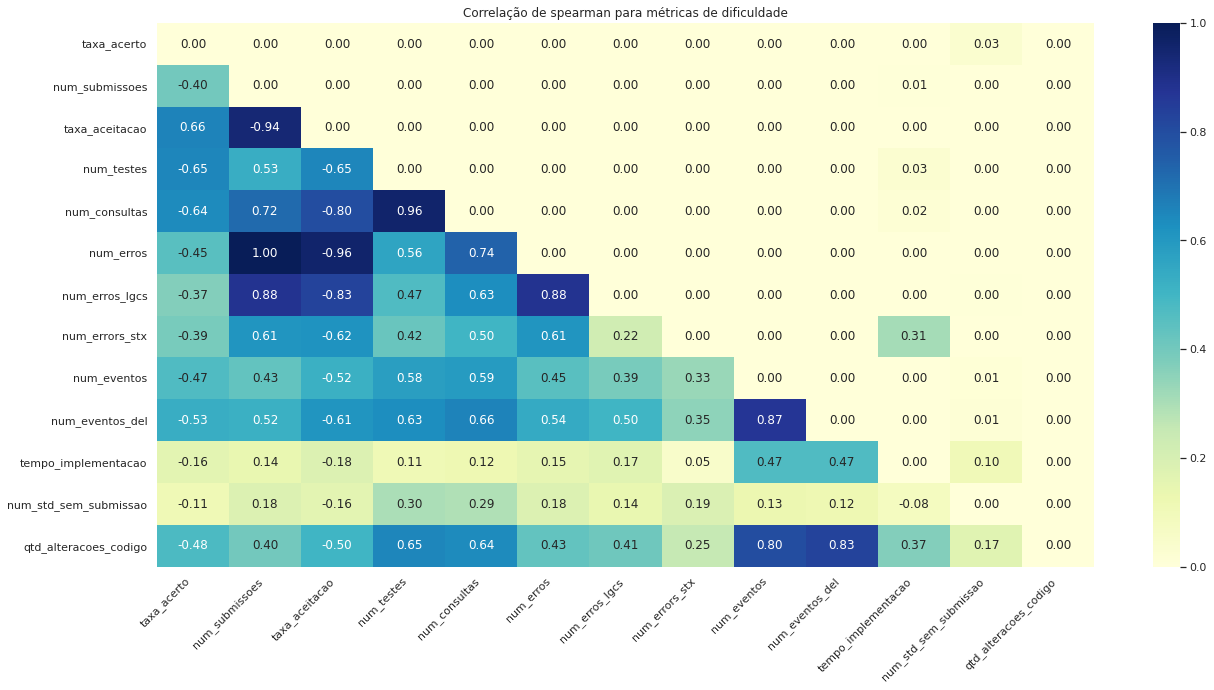

In [17]:
df_corr = pd.DataFrame(index=variaveis, columns=variaveis, dtype=np.float32)
for i in range(variaveis.shape[0]):
    for j in range(i, variaveis.shape[0]):
            spearman_val, pval = spearmanr(
                statistics_df[variaveis[i]].tolist(), 
                statistics_df[variaveis[j]].tolist()
            )
            df_corr.iloc[j,i] = round(spearman_val,2)
            df_corr.iloc[i,j] = pval

sns.set()
plt.figure(figsize=(21,10)),
ax = sns.heatmap(df_corr.abs(), vmin=0, vmax=1, annot=df_corr, xticklabels=labels, yticklabels=labels, fmt='.2f', cmap="YlGnBu")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Correlação de spearman para métricas de dificuldade")
plt.show()

## Teste do qui-quadrado

In [ ]:
def classify(rows, limiar, reverse=False):
    if reverse:
        return rows.apply(lambda row: 'facil' if row >= limiar else 'nao facil')
    else:
        return rows.apply(lambda row: 'facil' if row <= limiar else 'nao facil')

def tabela_contigencia(rows_a, rows_b, limiar_a, limiar_b, ra, rb):
    ca = classify(rows_a, limiar_a, ra)
    cb = classify(rows_b, limiar_b, rb)
    return pd.crosstab(index=ca, columns=cb, margins=True)

In [ ]:
m1 = statistics_df['taxa_acerto']
m2 = statistics_df['taxa_aceitacao']
limiar_m1 = 0.61
limiar_m2 = statistics_df['taxa_aceitacao'].median(axis = 0)

df_ctg = tabela_contigencia(m1, m2, limiar_m1, limiar_m2, True, True)
df_ctg

In [ ]:
sns.heatmap(df_ctg.iloc[:-1, :-1], annot=True, fmt='.3g', cmap="YlGnBu")

In [ ]:
from scipy.stats import chi2_contingency

df_chi_square = pd.DataFrame(index=variaveis, columns=variaveis, dtype=np.float32)
n = variaveis.shape[0]

for i in range(n):
    for j in range(i+1):
        row_a = statistics_df[variaveis[i]]
        row_b = statistics_df[variaveis[j]]
        
        limiar_a = 0.61 if variaveis[i] == 'taxa_acerto' else row_a.median(axis = 0)
        limiar_b = 0.61 if variaveis[j] == 'taxa_acerto' else row_b.median(axis = 0)
        
        ra = variaveis[i] in ['taxa_acerto', 'taxa_aceitacao']
        rb = variaveis[j] in ['taxa_acerto', 'taxa_aceitacao']
        
        contigency_tb = tabela_contigencia(row_a, row_b, limiar_a, limiar_b, ra, rb)
        qui2, p, _, _ = chi2_contingency(contigency_tb)
        
        df_chi_square.iloc[j,i] = p
        df_chi_square.iloc[i,j] = qui2
df_chi_square

## Correlação tetracórica

In [ ]:
def tetrachoric(m):
    if m.iloc[0][1] * m.iloc[1][0] == 0:
        return 1
    return np.cos(np.pi / (1 + np.sqrt((m.iloc[0][0] * m.iloc[1][1]) / (m.iloc[0][1] * m.iloc[1][0]))))

def tetrachoric2(m):
    if m.iloc[0][1] * m.iloc[1][0] == 0:
        return 1
    y = np.power((m.iloc[0][0] * m.iloc[1][1]) / (m.iloc[0][1] * m.iloc[1][0]), np.pi / 4)
    return (y-1) / (y+1)

In [ ]:
df_tet = pd.DataFrame(index=variaveis, columns=variaveis, dtype=np.float32)
n = variaveis.shape[0]

for i in range(n):
    for j in range(i+1):
        row_a = statistics_df[variaveis[i]]
        row_b = statistics_df[variaveis[j]]
        
        limiar_a = 0.61 if variaveis[i] == 'taxa_acerto' else row_a.median(axis = 0)
        limiar_b = 0.61 if variaveis[j] == 'taxa_acerto' else row_b.median(axis = 0)
        
        ra = variaveis[i] in ['taxa_acerto', 'taxa_aceitacao']
        rb = variaveis[j] in ['taxa_acerto', 'taxa_aceitacao']
        
        contigency_tb = tabela_contigencia(row_a, row_b, limiar_a, limiar_b, ra, rb)
        tv = tetrachoric(contigency_tb)
        
        df_tet.iloc[j,i] = round(tv,2)
        df_tet.iloc[i,j] = round(tv,2)

sns.set()
plt.figure(figsize=(21,10))
ax = sns.heatmap(df_tet.abs(), vmin=0, vmax=1, annot=df_tet, xticklabels=labels, yticklabels=labels, cmap="YlGnBu")
plt.title("Correlação tetracórica para métricas de dificuldade")
plt.show()

# Correlação para variáveis independentes

In [18]:
# Obtém csv com as métricas de código da solução do instrutor
code_prof_df = pd.read_csv('../output/data/code_metrics_professor.csv', index_col='question_id')
code_prof_df = code_prof_df[code_prof_df.index.isin(df.index)]
code_prof_df

,complexity,n_classes,n_functions,loc,lloc,sloc,comments,single_comments,multi_comments,blank_lines,...,builtin_type,builtin_func,kwd_print,kwd_input,builtin_type_unique,builtin_func_unique,identifiers_unique,identifiers_max_len,identifiers_min_len,identifiers_mean_len
question_id,,,,,,,,,,,,,,,,,,,,,
1027,1.0,0.0,0.0,6.0,4.0,4.0,0.0,0.0,0.0,2.0,...,1.0,1.0,1.0,1.0,1,3,2,11,7,9.000000
1028,1.0,0.0,0.0,6.0,4.0,4.0,0.0,0.0,0.0,2.0,...,1.0,1.0,1.0,1.0,1,3,2,9,6,7.500000
1029,1.0,0.0,0.0,6.0,4.0,4.0,0.0,0.0,0.0,2.0,...,1.0,1.0,1.0,1.0,1,3,2,11,7,9.000000
1030,1.0,0.0,0.0,6.0,4.0,4.0,0.0,0.0,0.0,2.0,...,1.0,1.0,1.0,1.0,1,3,2,9,7,8.000000
1031,1.0,0.0,0.0,6.0,4.0,4.0,0.0,0.0,0.0,2.0,...,1.0,1.0,1.0,1.0,1,3,2,12,11,11.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210,4.0,0.0,0.0,31.0,16.0,15.0,2.0,2.0,5.0,9.0,...,8.0,NaN,2.0,2.0,3,2,11,9,1,5.181818
3229,1.0,0.0,0.0,13.0,7.0,8.0,3.0,2.0,0.0,3.0,...,NaN,1.0,1.0,1.0,0,3,9,7,1,4.555556
3309,1.0,0.0,0.0,6.0,4.0,4.0,0.0,0.0,0.0,2.0,...,1.0,1.0,1.0,1.0,1,3,2,11,5,8.000000


In [19]:
# Dataset de métricas de código (autoria de Marcos Avner)
CODE_SRC = '../output/data/metricas_estudantes.csv'
code_df = pd.read_csv(CODE_SRC)
code_df

,periodo,turma,estudante,atividade,exercicio,complexity,n_classes,n_functions,loc,lloc,...,builtin_type,builtin_func,kwd_print,kwd_input,builtin_type_unique,builtin_func_unique,identifiers_unique,identifiers_max_len,identifiers_min_len,identifiers_mean_len
0,2017-1,144,2198,490,1386,2.0,0.0,0.0,11.0,8.0,...,2.0,2.0,2.0,2.0,1,3,4,2.0,1.0,1.250000
1,2017-1,144,2198,536,1079,7.0,0.0,0.0,25.0,15.0,...,3.0,1.0,4.0,3.0,1,3,7,4.0,1.0,2.285714
2,2017-1,144,2198,490,869,1.0,0.0,0.0,8.0,3.0,...,1.0,1.0,1.0,1.0,1,3,2,5.0,1.0,3.000000
3,2017-1,144,2198,515,1937,2.0,0.0,0.0,13.0,11.0,...,2.0,2.0,2.0,1.0,1,3,8,5.0,1.0,1.500000
4,2017-1,144,2198,639,672,1.0,0.0,0.0,4.0,4.0,...,2.0,NaN,1.0,1.0,1,2,5,5.0,1.0,3.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180098,2018-1,190,3097,1272,1277,1.0,0.0,0.0,8.0,8.0,...,2.0,NaN,1.0,2.0,1,2,8,6.0,1.0,3.625000
180099,2018-1,190,3097,1041,2043,1.0,0.0,0.0,6.0,6.0,...,4.0,1.0,1.0,4.0,1,3,5,15.0,11.0,12.800000
180100,2018-1,190,3097,1041,1803,1.0,0.0,0.0,9.0,9.0,...,1.0,NaN,1.0,1.0,1,2,8,18.0,7.0,9.875000
180101,2018-1,190,3097,1053,1027,1.0,0.0,0.0,5.0,5.0,...,1.0,1.0,1.0,1.0,1,3,4,18.0,4.0,13.500000


In [20]:
# Seleciona apenas exames
exams = pd.read_csv('../output/data/assessments.csv')
exams

,id
0,465
1,468
2,473
3,474
4,475
...,...
352,2000
353,2003
354,2015
355,2018


In [21]:
# Filtra apenas por exames
code_df = code_df[code_df['atividade'].isin(exams['id'].tolist())]
code_df

,periodo,turma,estudante,atividade,exercicio,complexity,n_classes,n_functions,loc,lloc,...,builtin_type,builtin_func,kwd_print,kwd_input,builtin_type_unique,builtin_func_unique,identifiers_unique,identifiers_max_len,identifiers_min_len,identifiers_mean_len
3,2017-1,144,2198,515,1937,2.0,0.0,0.0,13.0,11.0,...,2.0,2.0,2.0,1.0,1,3,8,5.0,1.0,1.5
6,2017-1,144,2198,515,1407,NaN,NaN,NaN,6.0,5.0,...,NaN,NaN,NaN,4.0,0,1,4,4.0,2.0,3.5
17,2017-1,144,2198,515,1406,2.0,0.0,0.0,11.0,9.0,...,4.0,NaN,2.0,3.0,1,2,5,2.0,1.0,1.4
19,2017-1,144,2198,465,1355,1.0,0.0,0.0,11.0,6.0,...,4.0,NaN,1.0,3.0,2,2,6,6.0,1.0,3.0
22,2017-1,144,2198,612,1538,4.0,0.0,0.0,14.0,14.0,...,2.0,1.0,1.0,2.0,1,3,6,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180062,2018-1,190,3097,1263,1657,1.0,0.0,0.0,2.0,1.0,...,NaN,NaN,NaN,NaN,0,0,1,5.0,5.0,5.0
180074,2018-1,190,3097,1308,2623,4.0,0.0,0.0,13.0,10.0,...,3.0,3.0,1.0,1.0,2,4,12,6.0,1.0,4.0
180079,2018-1,190,3097,1224,2551,NaN,NaN,NaN,8.0,7.0,...,NaN,1.0,NaN,1.0,0,2,6,7.0,1.0,3.0
180086,2018-1,190,3097,1146,1109,11.0,0.0,0.0,26.0,24.0,...,2.0,NaN,10.0,2.0,2,2,2,5.0,4.0,4.5


In [22]:
# Seleciona apenas os alunos que acertaram a questão
corrected_sol_df = df_exec_by_std[df_exec_by_std['is_correct']] \
    .drop(columns=['amount_of_change', 'num_queries', 'num_logic_errors'])
corrected_sol_df

,student,question,is_correct,num_submissions,num_tests,num_errors,num_syntax_errors
0,2198,1406,True,1,5,0,0
1,2198,1644,True,1,48,0,0
2,2198,1372,True,3,7,2,0
6,2198,1620,True,8,9,7,0
7,2198,1937,True,1,3,0,0
...,...,...,...,...,...,...,...
16302,6412,1599,True,1,0,0,0
16304,6412,2219,True,1,0,0,0
16306,6412,1648,True,26,12,25,19
16307,6412,2031,True,5,5,4,3


In [23]:
corrected_sol_df = corrected_sol_df[~corrected_sol_df['question'].isin(code_prof_df.index)]
corrected_sol_df

,student,question,is_correct,num_submissions,num_tests,num_errors,num_syntax_errors
7,2198,1937,True,1,3,0,0
11,2198,1841,True,4,36,3,0
13,2198,2147,True,5,37,4,0
14,2198,1982,True,1,2,0,0
19,2198,1996,True,2,7,1,0
...,...,...,...,...,...,...,...
12474,4173,2944,True,2,3,1,0
12505,3135,2944,True,1,12,0,0
12532,4171,2944,True,1,24,0,0
12694,4083,1289,True,1,14,0,0


In [24]:
# Seleciona as métricas de código dos alunos que acertaram a questão
corrected_code_metrics_df = corrected_sol_df.merge(code_df, how='inner', left_on=['student', 'question'], right_on=['estudante', 'exercicio'])
corrected_code_metrics_df

,student,question,is_correct,num_submissions,num_tests,num_errors,num_syntax_errors,periodo,turma,estudante,...,builtin_type,builtin_func,kwd_print,kwd_input,builtin_type_unique,builtin_func_unique,identifiers_unique,identifiers_max_len,identifiers_min_len,identifiers_mean_len
0,2198,1937,True,1,3,0,0,2017-1,144,2198,...,2.0,2.0,2.0,1.0,1,3,8,5.0,1.0,1.500000
1,2198,1841,True,4,36,3,0,2017-1,144,2198,...,3.0,NaN,1.0,2.0,2,2,6,4.0,1.0,2.166667
2,2198,2147,True,5,37,4,0,2017-1,144,2198,...,NaN,3.0,2.0,1.0,0,3,4,1.0,1.0,1.000000
3,2198,1982,True,1,2,0,0,2017-1,144,2198,...,NaN,NaN,5.0,2.0,0,2,4,5.0,1.0,2.000000
4,2198,1996,True,2,7,1,0,2017-1,144,2198,...,NaN,3.0,5.0,1.0,0,3,8,5.0,1.0,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,4173,2944,True,2,3,1,0,2019-1,223,4173,...,1.0,NaN,3.0,1.0,1,2,4,1.0,1.0,1.000000
2027,3135,2944,True,1,12,0,0,2019-1,223,3135,...,1.0,NaN,3.0,1.0,1,2,4,1.0,1.0,1.000000
2028,4171,2944,True,1,24,0,0,2019-1,223,4171,...,1.0,NaN,3.0,1.0,1,2,4,7.0,3.0,4.750000
2029,4083,1289,True,1,14,0,0,2019-1,222,4083,...,NaN,6.0,8.0,1.0,0,5,10,6.0,1.0,2.700000


In [25]:
# Para cada questão, seleciona uma solução de exemplo feita por estudante, com base em três critérios:
# 1. Menor número de submissões
# 2. Menor número de testes
# 3. Menor número de erros
best_sol = {}
for row in corrected_code_metrics_df.iterrows():
    data = row[1]
    row_student = data['student']
    row_question = data['question']
    row_activity = data['atividade']
    
    info = (data['num_submissions'], data['num_tests'], data['num_syntax_errors'])
    if not row_question in best_sol or info < best_sol[row_question][1:]:
        best_sol[row_question] = (row_student, row_activity, *info)

best_sol = pd.DataFrame([(key, value[0], value[1]) for key, value in best_sol.items()], columns = ['question', 'student', 'activity'])
best_sol

,question,student,activity
0,1937,2387,525
1,1841,2833,833
2,2147,2397,715
3,1982,2851,886
4,1996,2929,888
...,...,...,...
74,1033,3434,1053
75,1034,3076,1053
76,1037,2409,1053
77,1096,3081,1096


In [26]:
code_metrics_df = best_sol.merge(code_df, 
                   how='inner', 
                   left_on=['question', 'student', 'activity'], 
                   right_on=['exercicio', 'estudante', 'atividade'], 
                   sort=['question'])
code_metrics_df

,question,student,activity,periodo,turma,estudante,atividade,exercicio,complexity,n_classes,...,builtin_type,builtin_func,kwd_print,kwd_input,builtin_type_unique,builtin_func_unique,identifiers_unique,identifiers_max_len,identifiers_min_len,identifiers_mean_len
0,1002,3489,1053,2018-1,190,3489,1053,1002,1.0,0.0,...,2.0,1.0,1.0,2.0,1,3,6,12.0,2.0,6.000000
1,1020,3522,1053,2018-1,190,3522,1053,1020,1.0,0.0,...,4.0,1.0,1.0,4.0,1,3,6,5.0,1.0,2.166667
2,1023,3097,1053,2018-1,190,3097,1053,1023,1.0,0.0,...,2.0,1.0,1.0,2.0,1,3,6,19.0,2.0,8.333333
3,1025,3080,1053,2018-1,190,3080,1053,1025,1.0,0.0,...,3.0,1.0,1.0,3.0,1,3,5,11.0,1.0,5.400000
4,1033,3434,1053,2018-1,190,3434,1053,1033,1.0,0.0,...,1.0,1.0,1.0,1.0,1,3,5,5.0,1.0,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2150,2399,715,2017-1,139,2399,715,2150,6.0,0.0,...,2.0,1.0,1.0,1.0,2,3,12,5.0,1.0,3.250000
75,2152,2395,715,2017-1,139,2395,715,2152,5.0,0.0,...,3.0,1.0,1.0,1.0,2,3,10,5.0,1.0,2.900000
76,2153,2408,715,2017-1,139,2408,715,2153,2.0,0.0,...,1.0,3.0,1.0,2.0,1,4,9,5.0,1.0,2.888889
77,2155,2403,715,2017-1,139,2403,715,2155,14.0,0.0,...,2.0,4.0,3.0,2.0,2,5,13,5.0,1.0,3.000000


In [27]:
drop_cols = ['student', 'activity', 'periodo', 'turma', 'estudante', 'atividade', 'exercicio']
code_metrics_df = code_metrics_df \
    .drop(columns=drop_cols) \
    .set_index('question') \
    .append(code_prof_df) \
    .sort_index()
code_metrics_df

,complexity,n_classes,n_functions,loc,lloc,sloc,comments,single_comments,multi_comments,blank_lines,...,builtin_type,builtin_func,kwd_print,kwd_input,builtin_type_unique,builtin_func_unique,identifiers_unique,identifiers_max_len,identifiers_min_len,identifiers_mean_len
1002,1.0,0.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,2.0,1,3,6,12.0,2.0,6.000000
1020,1.0,0.0,0.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,...,4.0,1.0,1.0,4.0,1,3,6,5.0,1.0,2.166667
1023,1.0,0.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,2.0,1,3,6,19.0,2.0,8.333333
1025,1.0,0.0,0.0,10.0,6.0,6.0,3.0,3.0,0.0,1.0,...,3.0,1.0,1.0,3.0,1,3,5,11.0,1.0,5.400000
1027,1.0,0.0,0.0,6.0,4.0,4.0,0.0,0.0,0.0,2.0,...,1.0,1.0,1.0,1.0,1,3,2,11.0,7.0,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210,4.0,0.0,0.0,31.0,16.0,15.0,2.0,2.0,5.0,9.0,...,8.0,NaN,2.0,2.0,3,2,11,9.0,1.0,5.181818
3229,1.0,0.0,0.0,13.0,7.0,8.0,3.0,2.0,0.0,3.0,...,NaN,1.0,1.0,1.0,0,3,9,7.0,1.0,4.555556
3309,1.0,0.0,0.0,6.0,4.0,4.0,0.0,0.0,0.0,2.0,...,1.0,1.0,1.0,1.0,1,3,2,11.0,5.0,8.000000
3583,3.0,0.0,0.0,22.0,10.0,9.0,1.0,1.0,7.0,5.0,...,NaN,3.0,1.0,1.0,0,5,6,9.0,1.0,4.166667


In [28]:
# Confirma que as variáveis independentes e dependentes pertencem a uma mesma questão
code_metrics_df.index.tolist() == df.index.tolist()

True

## Correlação de spearman

In [29]:
code_metrics_df.fillna(0.0, inplace=True)

In [30]:
ind_vars = code_metrics_df.columns
ind_vars

Index(['complexity', 'n_classes', 'n_functions', 'loc', 'lloc', 'sloc',
       'comments', 'single_comments', 'multi_comments', 'blank_lines',
       ...
       'builtin_type', 'builtin_func', 'kwd_print', 'kwd_input',
       'builtin_type_unique', 'builtin_func_unique', 'identifiers_unique',
       'identifiers_max_len', 'identifiers_min_len', 'identifiers_mean_len'],
      dtype='object', length=130)

In [31]:
df_ind_corrs = pd.DataFrame(index=ind_vars, columns=variaveis, dtype=np.float32)
for i in range(df_ind_corrs.shape[0]):
    for j in range(df_ind_corrs.shape[1]):
        spearman_val, _ = spearmanr(
            code_metrics_df[ind_vars[i]].tolist(),
            statistics_df[variaveis[j]].tolist()
        )
        df_ind_corrs.iloc[i,j] = spearman_val
        
df_ind_corrs.dropna(how='all')

/home/jackson/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


,taxa_acerto,num_submissoes,taxa_aceitacao,num_testes,num_consultas,num_erros,num_erros_lgcs,num_errors_stx,num_eventos,num_eventos_del,tempo_implementacao,num_std_sem_submissao,qtd_alteracoes_codigo
complexity,-0.186417,0.087719,-0.135825,0.158089,0.156842,0.098069,0.201942,-0.083942,0.518087,0.452404,0.279035,0.089222,0.566354
loc,-0.178397,0.035279,-0.090076,0.118898,0.110215,0.045704,0.094082,-0.004271,0.211334,0.245346,0.124774,0.278441,0.355643
lloc,-0.201114,0.175780,-0.221665,0.138505,0.167829,0.185587,0.271287,-0.025157,0.489267,0.488171,0.366123,0.141032,0.570624
sloc,-0.189872,0.172989,-0.217488,0.132953,0.163638,0.182629,0.277942,-0.048502,0.501875,0.494377,0.395469,0.127665,0.566544
comments,-0.174613,-0.014821,-0.035804,0.212520,0.176302,-0.003848,-0.028421,0.081804,0.031768,0.033877,0.018046,0.292328,0.156095
...,...,...,...,...,...,...,...,...,...,...,...,...,...
builtin_func_unique,-0.067031,0.018232,-0.031218,0.170143,0.134889,0.021019,-0.055786,0.195839,0.126650,0.101788,0.152103,0.032367,0.224519
identifiers_unique,-0.205105,0.043472,-0.111303,0.122298,0.113063,0.058665,-0.023272,0.220584,0.222825,0.228060,0.339029,0.061606,0.271670
identifiers_max_len,-0.094345,-0.020467,-0.011222,0.045116,0.029267,-0.012290,-0.053463,0.034828,-0.118167,-0.055757,-0.152950,0.060268,-0.037796
identifiers_min_len,0.214659,-0.023612,0.095265,-0.195677,-0.164947,-0.038950,0.001303,-0.104163,-0.254424,-0.214477,-0.326217,0.006854,-0.285187


In [32]:
topk = 10
best_code_metrics = pd.DataFrame(index=df_ind_corrs.columns, columns=np.arange(1,topk+1))
for i in range(best_code_metrics.shape[0]):
    values = df_ind_corrs[variaveis[i]].sort_values(ascending=False, key=lambda row: row.abs())[:topk]
    best_code_metrics.iloc[i] = list(zip(values, values.index))

best_code_metrics

,1,2,3,4,5,6,7,8,9,10
taxa_acerto,"(-0.30552470684051514, identifier)","(-0.29370424151420593, h1)","(-0.2922678589820862, less)","(-0.28647175431251526, difficulty)","(-0.24583962559700012, equal)","(-0.21682347357273102, greater)","(0.2146594375371933, identifiers_min_len)","(-0.20850422978401184, minus)","(-0.2051815390586853, effort)","(-0.2051815390586853, time)"
num_submissoes,"(0.23008158802986145, rpar)","(0.23008158802986145, lpar)","(0.22446073591709137, h1)","(0.19922949373722076, kwd_print)","(0.19764909148216248, difficulty)","(0.18161694705486298, effort)","(0.18161694705486298, time)","(0.17578008770942688, lloc)","(0.17298851907253265, sloc)","(0.17212292551994324, newline)"
taxa_aceitacao,"(-0.2888731360435486, h1)","(-0.2619256377220154, difficulty)","(-0.2557145357131958, rpar)","(-0.2557145357131958, lpar)","(-0.22531796991825104, time)","(-0.22531796991825104, effort)","(-0.2216646373271942, lloc)","(-0.21857154369354248, newline)","(-0.2174881249666214, sloc)","(-0.20100447535514832, h)"
num_testes,"(0.3106674253940582, h1)","(0.2987344563007355, difficulty)","(0.2298153191804886, less)","(0.21728821098804474, minus)","(0.21591918170452118, greater)","(0.21251952648162842, comments)","(0.21251952648162842, comment)","(0.2079281061887741, identifier)","(0.1965913474559784, single_comments)","(-0.19567734003067017, identifiers_min_len)"
num_consultas,"(0.3222953677177429, h1)","(0.30296099185943604, difficulty)","(0.21155893802642822, greater)","(0.2104509323835373, time)","(0.2104509323835373, effort)","(0.20780977606773376, minus)","(0.20574815571308136, less)","(0.20002517104148865, identifier)","(0.17630210518836975, comments)","(0.17630210518836975, comment)"
num_erros,"(0.23934867978096008, h1)","(0.23527108132839203, lpar)","(0.23527108132839203, rpar)","(0.21204589307308197, difficulty)","(0.1913093775510788, time)","(0.1913093775510788, effort)","(0.18558719754219055, lloc)","(0.1852104514837265, kwd_print)","(0.18262910842895508, sloc)","(0.18201690912246704, newline)"
num_erros_lgcs,"(0.2914249002933502, kwd_print)","(0.27794232964515686, sloc)","(0.27128657698631287, lloc)","(0.2671052813529968, newline)","(0.26305148005485535, h1)","(0.25924766063690186, effort)","(0.25924766063690186, time)","(0.2555026710033417, difficulty)","(0.24855361878871918, rpar)","(0.24855361878871918, lpar)"
num_errors_stx,"(0.22058448195457458, identifiers_unique)","(0.19583913683891296, builtin_func_unique)","(0.1698601096868515, builtin_func)","(-0.14278289675712585, eq_equal)","(0.14261764287948608, builtin_type_unique)","(-0.13312943279743195, string)","(0.1315624862909317, lsqb)","(0.1315624862909317, rsqb)","(0.1145312562584877, number_float)","(-0.10650470107793808, N1)"
num_eventos,"(0.5180866122245789, complexity)","(0.5072913765907288, keyword)","(0.5018754005432129, sloc)","(0.4892667829990387, lloc)","(0.4881135821342468, dedent)","(0.4881135821342468, indent)","(0.4865820109844208, newline)","(0.48560601472854614, identifier)","(0.48155340552330017, colon)","(0.41986483335494995, rpar)"
num_eventos_del,"(0.49437710642814636, sloc)","(0.48817119002342224, lloc)","(0.4864707589149475, newline)","(0.45340168476104736, identifier)","(0.4524044990539551, complexity)","(0.4363662898540497, dedent)","(0.4363662898540497, indent)","(0.4317333400249481, colon)","(0.42972585558891296, keyword)","(0.42258894443511963, rpar)"


In [33]:
most_frequent_metrics = dict()
for key, values in best_code_metrics.iterrows():
    for _, corr in values.items():
        value = corr[1]
        if not value in most_frequent_metrics:
            most_frequent_metrics[value] = 0
        most_frequent_metrics[value] += 1

topk = 10
most_frequent_metrics_ls = list(
    map(
        lambda x: x[0],
        sorted(most_frequent_metrics.items(), key=lambda data: data[-1], reverse=True)[:topk],
    )
)
most_frequent_metrics_ls

['difficulty',
 'rpar',
 'lloc',
 'sloc',
 'newline',
 'identifier',
 'h1',
 'effort',
 'time',
 'lpar']

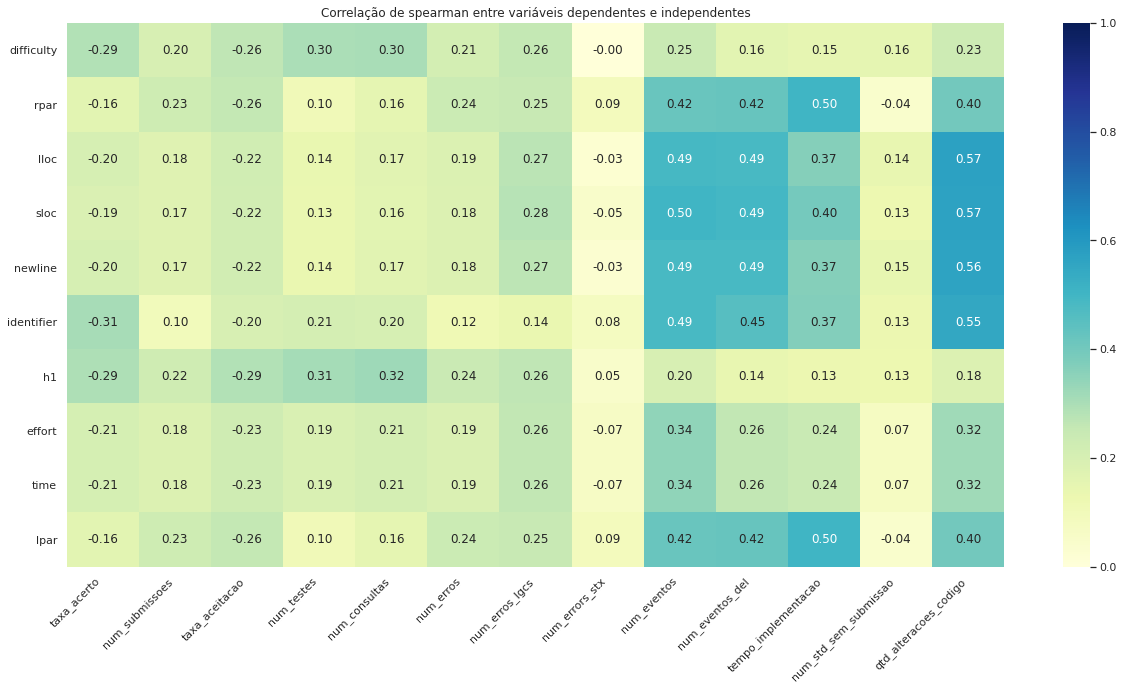

In [35]:
df_ind_corrs_best = pd.DataFrame(index=most_frequent_metrics_ls, columns=variaveis, dtype=np.float32)
for i in range(df_ind_corrs_best.shape[0]):
    for j in range(df_ind_corrs_best.shape[1]):
        row_a = code_metrics_df[most_frequent_metrics_ls[i]].fillna(0.0)
        row_b = statistics_df[variaveis[j]]
        
        spearman_val, _ = spearmanr(row_a.tolist(), row_b.tolist())
        df_ind_corrs_best.iloc[i,j] = spearman_val

sns.set()
plt.figure(figsize=(21,10))
ax = sns.heatmap(df_ind_corrs_best.abs(), vmin=0, vmax=1, annot=df_ind_corrs_best, fmt='.2f', xticklabels=labels, yticklabels=most_frequent_metrics_ls, cmap="YlGnBu")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.title("Correlação de spearman entre variáveis dependentes e independentes")
plt.show()
# df_ind_corrs_best

## Correlação point-biserial

In [ ]:
from scipy.stats import pointbiserialr

In [ ]:
df_ind_corrs = pd.DataFrame(index=ind_vars, columns=variaveis, dtype=np.float32)
for i in range(df_ind_corrs.shape[0]):
    for j in range(df_ind_corrs.shape[1]):
        row_a = code_metrics_df[ind_vars[i]].fillna(0.0)
        row_b = statistics_df[variaveis[j]]
        
        limiar_b = 0.61 if variaveis[j] == 'taxa_acerto' else row_b.median(axis = 0)
        
        rb = variaveis[j] in ['taxa_acerto', 'taxa_aceitacao']
        
        classified_df = classify(row_b, limiar_b, rb).apply(lambda row: 1 if row == 'facil' else 0)
        val, _ = pointbiserialr(classified_df, row_a)
        
        df_ind_corrs.iloc[i,j] = val
        
df_ind_corrs.dropna(how='all')

In [36]:
topk = 10
best_code_metrics_pb = pd.DataFrame(index=df_ind_corrs.columns, columns=np.arange(1,topk+1))
for i in range(best_code_metrics_pb.shape[0]):
    values = df_ind_corrs[variaveis[i]].sort_values(ascending=False, key=lambda row: row.abs())[:topk]
    best_code_metrics_pb.iloc[i] = list(zip(values, values.index))

best_code_metrics_pb

,1,2,3,4,5,6,7,8,9,10
taxa_acerto,"(-0.30552470684051514, identifier)","(-0.29370424151420593, h1)","(-0.2922678589820862, less)","(-0.28647175431251526, difficulty)","(-0.24583962559700012, equal)","(-0.21682347357273102, greater)","(0.2146594375371933, identifiers_min_len)","(-0.20850422978401184, minus)","(-0.2051815390586853, effort)","(-0.2051815390586853, time)"
num_submissoes,"(0.23008158802986145, rpar)","(0.23008158802986145, lpar)","(0.22446073591709137, h1)","(0.19922949373722076, kwd_print)","(0.19764909148216248, difficulty)","(0.18161694705486298, effort)","(0.18161694705486298, time)","(0.17578008770942688, lloc)","(0.17298851907253265, sloc)","(0.17212292551994324, newline)"
taxa_aceitacao,"(-0.2888731360435486, h1)","(-0.2619256377220154, difficulty)","(-0.2557145357131958, rpar)","(-0.2557145357131958, lpar)","(-0.22531796991825104, time)","(-0.22531796991825104, effort)","(-0.2216646373271942, lloc)","(-0.21857154369354248, newline)","(-0.2174881249666214, sloc)","(-0.20100447535514832, h)"
num_testes,"(0.3106674253940582, h1)","(0.2987344563007355, difficulty)","(0.2298153191804886, less)","(0.21728821098804474, minus)","(0.21591918170452118, greater)","(0.21251952648162842, comments)","(0.21251952648162842, comment)","(0.2079281061887741, identifier)","(0.1965913474559784, single_comments)","(-0.19567734003067017, identifiers_min_len)"
num_consultas,"(0.3222953677177429, h1)","(0.30296099185943604, difficulty)","(0.21155893802642822, greater)","(0.2104509323835373, time)","(0.2104509323835373, effort)","(0.20780977606773376, minus)","(0.20574815571308136, less)","(0.20002517104148865, identifier)","(0.17630210518836975, comments)","(0.17630210518836975, comment)"
num_erros,"(0.23934867978096008, h1)","(0.23527108132839203, lpar)","(0.23527108132839203, rpar)","(0.21204589307308197, difficulty)","(0.1913093775510788, time)","(0.1913093775510788, effort)","(0.18558719754219055, lloc)","(0.1852104514837265, kwd_print)","(0.18262910842895508, sloc)","(0.18201690912246704, newline)"
num_erros_lgcs,"(0.2914249002933502, kwd_print)","(0.27794232964515686, sloc)","(0.27128657698631287, lloc)","(0.2671052813529968, newline)","(0.26305148005485535, h1)","(0.25924766063690186, effort)","(0.25924766063690186, time)","(0.2555026710033417, difficulty)","(0.24855361878871918, rpar)","(0.24855361878871918, lpar)"
num_errors_stx,"(0.22058448195457458, identifiers_unique)","(0.19583913683891296, builtin_func_unique)","(0.1698601096868515, builtin_func)","(-0.14278289675712585, eq_equal)","(0.14261764287948608, builtin_type_unique)","(-0.13312943279743195, string)","(0.1315624862909317, lsqb)","(0.1315624862909317, rsqb)","(0.1145312562584877, number_float)","(-0.10650470107793808, N1)"
num_eventos,"(0.5180866122245789, complexity)","(0.5072913765907288, keyword)","(0.5018754005432129, sloc)","(0.4892667829990387, lloc)","(0.4881135821342468, dedent)","(0.4881135821342468, indent)","(0.4865820109844208, newline)","(0.48560601472854614, identifier)","(0.48155340552330017, colon)","(0.41986483335494995, rpar)"
num_eventos_del,"(0.49437710642814636, sloc)","(0.48817119002342224, lloc)","(0.4864707589149475, newline)","(0.45340168476104736, identifier)","(0.4524044990539551, complexity)","(0.4363662898540497, dedent)","(0.4363662898540497, indent)","(0.4317333400249481, colon)","(0.42972585558891296, keyword)","(0.42258894443511963, rpar)"


In [37]:
best_code_metrics

,1,2,3,4,5,6,7,8,9,10
taxa_acerto,"(-0.30552470684051514, identifier)","(-0.29370424151420593, h1)","(-0.2922678589820862, less)","(-0.28647175431251526, difficulty)","(-0.24583962559700012, equal)","(-0.21682347357273102, greater)","(0.2146594375371933, identifiers_min_len)","(-0.20850422978401184, minus)","(-0.2051815390586853, effort)","(-0.2051815390586853, time)"
num_submissoes,"(0.23008158802986145, rpar)","(0.23008158802986145, lpar)","(0.22446073591709137, h1)","(0.19922949373722076, kwd_print)","(0.19764909148216248, difficulty)","(0.18161694705486298, effort)","(0.18161694705486298, time)","(0.17578008770942688, lloc)","(0.17298851907253265, sloc)","(0.17212292551994324, newline)"
taxa_aceitacao,"(-0.2888731360435486, h1)","(-0.2619256377220154, difficulty)","(-0.2557145357131958, rpar)","(-0.2557145357131958, lpar)","(-0.22531796991825104, time)","(-0.22531796991825104, effort)","(-0.2216646373271942, lloc)","(-0.21857154369354248, newline)","(-0.2174881249666214, sloc)","(-0.20100447535514832, h)"
num_testes,"(0.3106674253940582, h1)","(0.2987344563007355, difficulty)","(0.2298153191804886, less)","(0.21728821098804474, minus)","(0.21591918170452118, greater)","(0.21251952648162842, comments)","(0.21251952648162842, comment)","(0.2079281061887741, identifier)","(0.1965913474559784, single_comments)","(-0.19567734003067017, identifiers_min_len)"
num_consultas,"(0.3222953677177429, h1)","(0.30296099185943604, difficulty)","(0.21155893802642822, greater)","(0.2104509323835373, time)","(0.2104509323835373, effort)","(0.20780977606773376, minus)","(0.20574815571308136, less)","(0.20002517104148865, identifier)","(0.17630210518836975, comments)","(0.17630210518836975, comment)"
num_erros,"(0.23934867978096008, h1)","(0.23527108132839203, lpar)","(0.23527108132839203, rpar)","(0.21204589307308197, difficulty)","(0.1913093775510788, time)","(0.1913093775510788, effort)","(0.18558719754219055, lloc)","(0.1852104514837265, kwd_print)","(0.18262910842895508, sloc)","(0.18201690912246704, newline)"
num_erros_lgcs,"(0.2914249002933502, kwd_print)","(0.27794232964515686, sloc)","(0.27128657698631287, lloc)","(0.2671052813529968, newline)","(0.26305148005485535, h1)","(0.25924766063690186, effort)","(0.25924766063690186, time)","(0.2555026710033417, difficulty)","(0.24855361878871918, rpar)","(0.24855361878871918, lpar)"
num_errors_stx,"(0.22058448195457458, identifiers_unique)","(0.19583913683891296, builtin_func_unique)","(0.1698601096868515, builtin_func)","(-0.14278289675712585, eq_equal)","(0.14261764287948608, builtin_type_unique)","(-0.13312943279743195, string)","(0.1315624862909317, lsqb)","(0.1315624862909317, rsqb)","(0.1145312562584877, number_float)","(-0.10650470107793808, N1)"
num_eventos,"(0.5180866122245789, complexity)","(0.5072913765907288, keyword)","(0.5018754005432129, sloc)","(0.4892667829990387, lloc)","(0.4881135821342468, dedent)","(0.4881135821342468, indent)","(0.4865820109844208, newline)","(0.48560601472854614, identifier)","(0.48155340552330017, colon)","(0.41986483335494995, rpar)"
num_eventos_del,"(0.49437710642814636, sloc)","(0.48817119002342224, lloc)","(0.4864707589149475, newline)","(0.45340168476104736, identifier)","(0.4524044990539551, complexity)","(0.4363662898540497, dedent)","(0.4363662898540497, indent)","(0.4317333400249481, colon)","(0.42972585558891296, keyword)","(0.42258894443511963, rpar)"


In [38]:
code_metrics_df

,complexity,n_classes,n_functions,loc,lloc,sloc,comments,single_comments,multi_comments,blank_lines,...,builtin_type,builtin_func,kwd_print,kwd_input,builtin_type_unique,builtin_func_unique,identifiers_unique,identifiers_max_len,identifiers_min_len,identifiers_mean_len
1002,1.0,0.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,2.0,1,3,6,12.0,2.0,6.000000
1020,1.0,0.0,0.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,...,4.0,1.0,1.0,4.0,1,3,6,5.0,1.0,2.166667
1023,1.0,0.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,2.0,1,3,6,19.0,2.0,8.333333
1025,1.0,0.0,0.0,10.0,6.0,6.0,3.0,3.0,0.0,1.0,...,3.0,1.0,1.0,3.0,1,3,5,11.0,1.0,5.400000
1027,1.0,0.0,0.0,6.0,4.0,4.0,0.0,0.0,0.0,2.0,...,1.0,1.0,1.0,1.0,1,3,2,11.0,7.0,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210,4.0,0.0,0.0,31.0,16.0,15.0,2.0,2.0,5.0,9.0,...,8.0,0.0,2.0,2.0,3,2,11,9.0,1.0,5.181818
3229,1.0,0.0,0.0,13.0,7.0,8.0,3.0,2.0,0.0,3.0,...,0.0,1.0,1.0,1.0,0,3,9,7.0,1.0,4.555556
3309,1.0,0.0,0.0,6.0,4.0,4.0,0.0,0.0,0.0,2.0,...,1.0,1.0,1.0,1.0,1,3,2,11.0,5.0,8.000000
3583,3.0,0.0,0.0,22.0,10.0,9.0,1.0,1.0,7.0,5.0,...,0.0,3.0,1.0,1.0,0,5,6,9.0,1.0,4.166667


In [39]:
df

,num_students_interactions,num_submissions,num_tests,num_correct,num_errors,num_logic_errors,num_syntax_errors,amount_of_change,code_time,num_events,num_deletes,num_blank
question,,,,,,,,,,,,
1002,16,20,129,16,4,2,2,2428,0.000,1162,125,2
1020,20,135,360,18,117,27,90,10745,1584.173,16409,2479,14
1023,16,51,192,15,36,30,6,6531,836.307,7221,922,2
1025,18,32,237,17,15,8,7,8895,0.000,5587,703,5
1027,56,309,1273,50,259,76,183,20818,8242.707,53482,3662,26
...,...,...,...,...,...,...,...,...,...,...,...,...
3210,16,55,245,7,48,16,32,12689,1206.858,32139,1859,13
3229,41,66,87,41,25,5,20,2209,4311.045,6067,529,7
3309,23,214,472,19,195,66,129,8253,1100.396,34621,2026,8


In [40]:
dataset = code_metrics_df.merge(df, left_index=True, right_index=True)
dataset

,complexity,n_classes,n_functions,loc,lloc,sloc,comments,single_comments,multi_comments,blank_lines,...,num_tests,num_correct,num_errors,num_logic_errors,num_syntax_errors,amount_of_change,code_time,num_events,num_deletes,num_blank
1002,1.0,0.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,...,129,16,4,2,2,2428,0.000,1162,125,2
1020,1.0,0.0,0.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,...,360,18,117,27,90,10745,1584.173,16409,2479,14
1023,1.0,0.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,...,192,15,36,30,6,6531,836.307,7221,922,2
1025,1.0,0.0,0.0,10.0,6.0,6.0,3.0,3.0,0.0,1.0,...,237,17,15,8,7,8895,0.000,5587,703,5
1027,1.0,0.0,0.0,6.0,4.0,4.0,0.0,0.0,0.0,2.0,...,1273,50,259,76,183,20818,8242.707,53482,3662,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210,4.0,0.0,0.0,31.0,16.0,15.0,2.0,2.0,5.0,9.0,...,245,7,48,16,32,12689,1206.858,32139,1859,13
3229,1.0,0.0,0.0,13.0,7.0,8.0,3.0,2.0,0.0,3.0,...,87,41,25,5,20,2209,4311.045,6067,529,7
3309,1.0,0.0,0.0,6.0,4.0,4.0,0.0,0.0,0.0,2.0,...,472,19,195,66,129,8253,1100.396,34621,2026,8
3583,3.0,0.0,0.0,22.0,10.0,9.0,1.0,1.0,7.0,5.0,...,180,10,29,6,23,7017,1934.352,21255,1034,5


In [41]:
dataset.index.name = 'question'
best_code_metrics.index.name = 'metric'

In [42]:
valid_metrics = df_ind_corrs.dropna(how='all').index
valid_metrics

Index(['complexity', 'loc', 'lloc', 'sloc', 'comments', 'single_comments',
       'multi_comments', 'blank_lines', 'h1', 'h2', 'N1', 'N2', 'h', 'N',
       'calculated_N', 'volume', 'difficulty', 'effort', 'bugs', 'time',
       'string', 'newline', 'indent', 'dedent', 'lpar', 'rpar', 'lsqb', 'rsqb',
       'colon', 'comma', 'semi', 'plus', 'minus', 'star', 'slash', 'less',
       'greater', 'equal', 'dot', 'percent', 'eq_equal', 'not_eq', 'less_eq',
       'greater_eq', 'dbl_star', 'plus_eq', 'dbl_slash', 'comment', 'nl',
       'number_int', 'number_float', 'keyword', 'identifier', 'builtin_type',
       'builtin_func', 'kwd_print', 'kwd_input', 'builtin_type_unique',
       'builtin_func_unique', 'identifiers_unique', 'identifiers_max_len',
       'identifiers_min_len', 'identifiers_mean_len'],
      dtype='object')

In [43]:
best_code_metrics.to_csv('best_code_metrics.csv')

In [44]:
code_metrics_df[valid_metrics].to_csv('code_metrics.csv')

In [45]:
statistics_df.to_csv('question_info.csv')